About the Datasets

    Date format:
    The hour column is computed by integer dividing the timestamp by 3600 seconds. 
    For example, the first line of the network for "noaltarifazo_ruidazonacional" 
    has hour=429531. 
    This means a timestamp of 429531*3600=1546311600 and it implies that the pair 
    of hashtags (h1, h2) was used in the hour comprised between timestamp 1546311600 
    and timestamp 1546315200, which corresponds to "1 January 2019 0:00:00 - 0:00:00". 
    The event itself was centered on 4 January 2019.


Exercise goal
- Simple exploration of the datasets


## Load data and import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Data paths
n9_path = 'D:/FV/VIU/clean_data/9n_9ngranmarchaporlajusticia.csv'
noAlTar_path = 'D:/FV/VIU/clean_data/noaltarifazo_ruidazonacional.csv'

In [3]:
# Load data
noAlTar_df = pd.read_csv(noAlTar_path)
noAlTar_df['date'] =pd.to_datetime( noAlTar_df.hour * 3600, unit='s')
# check if all dates are on the hour
if all((noAlTar_df.date.dt.minute == 0) & (noAlTar_df.date.dt.second == 0)):
    print('All dates in "noaltarifazo_ruidazonacional" on the hour (ie. minute and seconds column are 0)')

n9_df = pd.read_csv(n9_path)
n9_df['date'] =pd.to_datetime(n9_df.hour * 3600, unit='s')

# check if all dates are on the hour
if all((n9_df.date.dt.minute == 0) & (n9_df.date.dt.second == 0)):
    print('All dates in "9n_9ngranmarchaporlajusticia" on the hour (ie. minute and seconds column are 0)')

All dates in "noaltarifazo_ruidazonacional" on the hour (ie. minute and seconds column are 0)
All dates in "9n_9ngranmarchaporlajusticia" on the hour (ie. minute and seconds column are 0)


what is the weight variable?

In [10]:
noAlTar_df['hashtag_l'] = noAlTar_df.hashtag.str.lower()
# from unicode import unicode
noAlTar_df['hashtag_l_c'] = noAlTar_df.hashtag.str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [11]:
print(noAlTar_df.hashtag.nunique())
print(noAlTar_df.hashtag_l.nunique())
print(noAlTar_df.hashtag_l_c.nunique())

23409
20267
19597


In [9]:
noAlTar_df.hashtag_l_c.value_counts()

hashtag_l_c
ruidazonacional      16935
ruidazo               6830
noaltarifazo          6800
bastadetarifazos      6088
marchadeantorchas     4794
                     ...  
ligaacb                  1
chaquenos                1
tumini                   1
programa1456             1
juventudsomos            1
Name: count, Length: 19597, dtype: int64

## Recreating Figure and Table 1

In [8]:
# Table 1 - can't be completely recreated because I don't have a tweet id

# Label periods for Same time  segmentation
noAlTar_df.loc[:, 'ST_periods'] = 'before'
noAlTar_df.loc[(noAlTar_df.date >= '2019-01-04 00:00') & (noAlTar_df.date < '2019-01-07 00:00'), 'ST_periods'] = 'during'
noAlTar_df.loc[noAlTar_df.date >= '2019-01-07 00:00', 'ST_periods'] = 'after'

# noAlTar_df.loc[noAlTar_df.date < '2019-01-04 03:00', 'ST_periods'] = 'before'
# noAlTar_df.loc[(noAlTar_df.date >= '2019-01-04 03:00') & (noAlTar_df.date < '2019-01-07 03:00'), 'ST_periods'] = 'during'
# noAlTar_df.loc[noAlTar_df.date >= '2019-01-07 03:00', 'ST_periods'] = 'after'

noAlTar_ST_periods = noAlTar_df[(noAlTar_df.date >= '2019-01-01 00:00') & (noAlTar_df.date < '2019-01-10 00:00')]

print('Hashtag count in "noaltarifazo" for Same time periods -> {}'.format(noAlTar_ST_periods.nunique()['hashtag']))


# Label periods for Same time  segmentation
n9_df.loc[:, 'ST_periods'] = 'before'
n9_df.loc[(n9_df.date >= '2019-11-09 00:00') & (n9_df.date < '2019-11-10 00:00'), 'ST_periods'] = 'during'
n9_df.loc[n9_df.date >= '2019-11-10 00:00', 'ST_periods'] = 'after'

n9_ST_periods = n9_df[(n9_df.date >= '2019-11-08 00:00') & (n9_df.date < '2019-11-11 00:00')]

print('Hashtag count in "9n" for Same time periods -> {}'.format(n9_ST_periods.nunique()['hashtag']))


Hashtag count in "noaltarifazo" for Same time periods -> 19730
Hashtag count in "9n" for Same time periods -> 15130


Nr of hashtags does not match paper. 

Probably the time periods are not defined in the same way. Ask Yérali what time is considered for the begining and end of the during period (the critical point)

In [233]:
# not sure how to create the segments in second approach

# Label periods for the Same nr of # usage

nr_of_hashtags_usage_during = noAlTar_df[noAlTar_df.ST_periods == 'during'].count()['hashtag']
nr_of_unique_hashtags_usage_during = noAlTar_df[noAlTar_df.ST_periods == 'during'].nunique()['hashtag']

print('Total nr. of hashtag usage:')
print('During ->',nr_of_hashtags_usage_during)
print('Before ->',noAlTar_df[noAlTar_df.ST_periods == 'before'].count()['hashtag'])
print('After ->',noAlTar_df[noAlTar_df.ST_periods == 'after'].count()['hashtag'])
print()
print('Unique nr of hashtag usage:')
print('During ->',nr_of_unique_hashtags_usage_during)
print('Before ->',noAlTar_df[noAlTar_df.ST_periods == 'before'].nunique()['hashtag'])
print('After ->',noAlTar_df[noAlTar_df.ST_periods == 'after'].nunique()['hashtag'])

Total nr. of hashtag usage:
During -> 86160
Before -> 39352
After -> 90399

Unique nr of hashtag usage:
During -> 8855
Before -> 7497
After -> 13150


### example figure 1 plot

In [234]:
noAlTar_ST_periods.loc[:, 'date'].min()

Timestamp('2019-01-01 03:00:00')

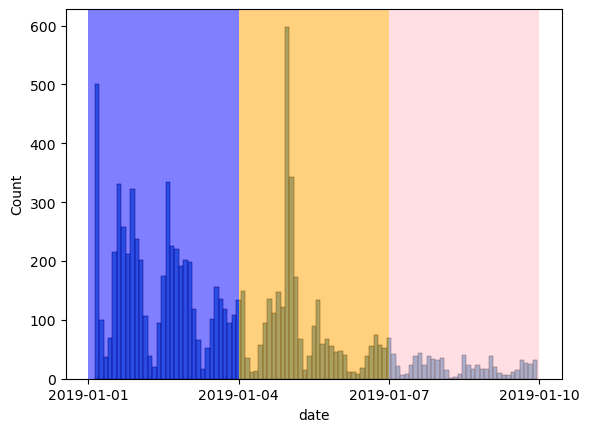

In [236]:


# sns.histplot(x = noAlTar_ST_periods.loc[noAlTar_ST_periods.hashtag == 'RuidazoNacional', 'date'], bins=100)
sns.histplot(x = noAlTar_ST_periods.loc[:, 'date'], bins=100)
marked_dates = pd.to_datetime(['2019-01-01', '2019-01-04', '2019-01-07', '2019-01-10'])
plt.xticks(marked_dates)
plt.axvspan(marked_dates[0], marked_dates[1], facecolor='b', alpha=0.5)
plt.axvspan(marked_dates[1], marked_dates[2], facecolor='orange', alpha=0.5)
plt.axvspan(marked_dates[2], marked_dates[3], facecolor='pink', alpha=0.5)

Text(0.5, 1.0, 'Total hashtag usage per time slot in "noaltarifazo"\nSegmented according to Same duration (100 bins)')

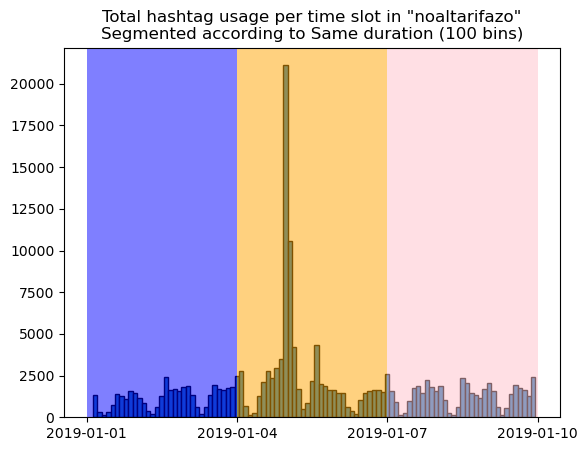

In [80]:
# hash_count = noAlTar_sameTime_periods.loc[noAlTar_sameTime_periods.hashtag.isin(['NoAlTarifazo', 'RuidazoNacional']), 
#                                           ['date', 'hashtag']].groupby('date').count().reset_index()

# hash_count = noAlTar_sameTime_periods.loc[noAlTar_sameTime_periods.hashtag.isin(['RuidazoNacional']), 
#                                           ['date', 'hashtag']].groupby('date').count().reset_index()

hash_count = noAlTar_ST_periods.loc[:, ['date', 'hashtag']].groupby('date').count().reset_index()

plt.hist(hash_count['date'], weights=hash_count['hashtag'], bins=100, edgecolor='black')

marked_dates = pd.to_datetime(['2019-01-01', '2019-01-04', '2019-01-07', '2019-01-10'])
plt.xticks(marked_dates)
plt.axvspan(marked_dates[0], marked_dates[1], facecolor='b', alpha=0.5)
plt.axvspan(marked_dates[1], marked_dates[2], facecolor='orange', alpha=0.5)
plt.axvspan(marked_dates[2], marked_dates[3], facecolor='pink', alpha=0.5)
plt.title('Total hashtag usage per time slot in "noaltarifazo"\nSegmented according to Same duration (100 bins)')

Text(0.5, 1.0, 'Total hashtag usage per time slot in "9n"\nSegmented according to Same duration (100 bins)')

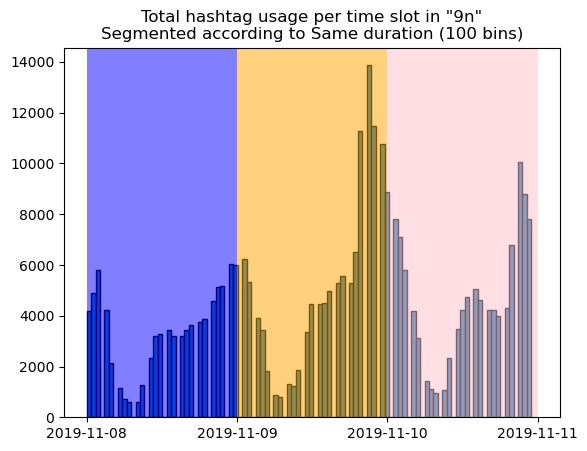

In [68]:
hash_count = n9_ST_periods.loc[:, ['date', 'hashtag']].groupby('date').count().reset_index()

plt.hist(hash_count['date'], weights=hash_count['hashtag'], bins=100, edgecolor='black')

marked_dates = pd.to_datetime(['2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11'])
plt.xticks(marked_dates)
plt.axvspan(marked_dates[0], marked_dates[1], facecolor='b', alpha=0.5)
plt.axvspan(marked_dates[1], marked_dates[2], facecolor='orange', alpha=0.5)
plt.axvspan(marked_dates[2], marked_dates[3], facecolor='pink', alpha=0.5)
plt.title('Total hashtag usage per time slot in "9n"\nSegmented according to Same duration (100 bins)')

## Example Network - Figure 2B

In [147]:
n9_example_nework_df =  n9_df[n9_df.date == '2019-11-09 21:00']


n9_example_nework_df.head()

,user,hashtag,hour,weight,date,ST_periods
195931,1160716239976697857,Bolivia,437037,1052.0,2019-11-09 21:00:00,during
195932,1160716239976697857,Bolivia,437037,1052.0,2019-11-09 21:00:00,during
195933,1160716239976697857,URGENTE,437037,643.0,2019-11-09 21:00:00,during
195934,1160716239976697857,URGENTE,437037,643.0,2019-11-09 21:00:00,during
195935,233904332,TodosParaUNO,437037,22.0,2019-11-09 21:00:00,during


In [2]:
import pickle
import numpy as np
import networkx as nx
from nestedness_master.nestedness_calculator import NestednessCalculator

with open('D:/FV/Personal/VIU/clean_data/link_list_example.pickle', 'rb') as f:
    link_list = pickle.load(f)

clean_link_list = [tup for tup in link_list if tup[2] != 0]

clean_link_arr = np.array(clean_link_list)
nodes = np.concatenate([clean_link_arr[:,0], clean_link_arr[:,1]])

print('Nr. of hashtags ->', len(np.unique(nodes)))
print('Nr of links ->', len(clean_link_list))

G = nx.Graph()
G.add_weighted_edges_from(clean_link_list)


Nr. of hashtags -> 830
Nr of links -> 9709


In [3]:
link_list

[('Bolivia', 'URGENTE', 146),
 ('Bolivia', 'TodosParaUNO', 0),
 ('Bolivia', '9NJusticiaYa', 121),
 ('Bolivia', 'SantaCruzdelasierra', 10),
 ('Bolivia', 'bolivia', 10),
 ('Bolivia', 'motinpolicial', 10),
 ('Bolivia', 'FelizSabado', 3),
 ('Bolivia', '9NGranMarchaPorLaJusticia', 136),
 ('Bolivia', 'EstoReciénComienza', 27),
 ('Bolivia', 'EDLP', 0),
 ('Bolivia', 'Libertad', 1),
 ('Bolivia', 'MuroDeBerlin', 7),
 ('Bolivia', 'LaPaz', 27),
 ('Bolivia', 'Volvimos', 1),
 ('Bolivia', '9NYoVoy', 87),
 ('Bolivia', 'Dia9NasRuas', 1),
 ('Bolivia', 'EvoAsesino', 6),
 ('Bolivia', 'Justicia', 16),
 ('Bolivia', 'Detingudes23S', 0),
 ('Bolivia', 'DetingutsPostSentència', 0),
 ('Bolivia', '9NJusticia', 93),
 ('Bolivia', 'ComodoroPy', 45),
 ('Bolivia', 'Chile', 15),
 ('Bolivia', '9Nov', 24),
 ('Bolivia', 'obscenos', 0),
 ('Bolivia', 'Repost', 0),
 ('Bolivia', 'Ahora', 6),
 ('Bolivia', 'PedimosDesafuero', 3),
 ('Bolivia', '9NJUSTICIA', 1),
 ('Bolivia', '9NMarchaPorLaJusticia', 3),
 ('Bolivia', 'ExtinciónDeD

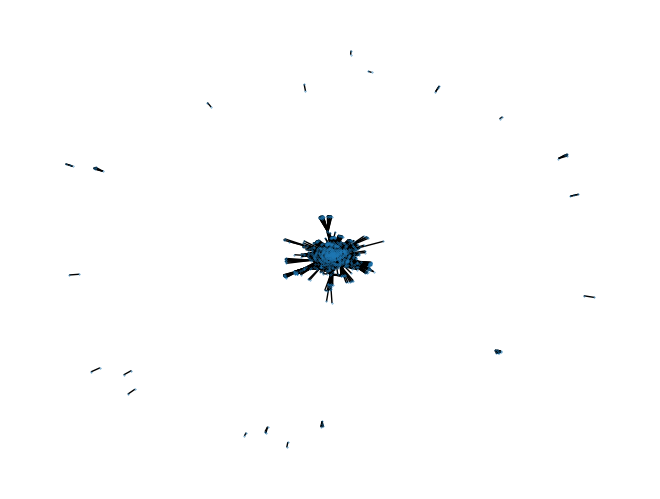

In [139]:
pos = nx.spring_layout(G, seed = 2)

nx.draw(G,pos,with_labels = False, node_size = .1)

In [154]:
n9_user_per_node = n9_example_nework_df.groupby('hashtag').user.agg(['count', 'nunique'])

n9_user_per_node

,count,nunique
hashtag,,
10N,16,10
11Nov,1,1
14NyJusticiaYA,4,1
16N,1,1
19O,2,1
...,...,...
ÚLTIMO,2,1
ÚLTIMO_,1,1
Último,3,2


In [8]:

# Calculate modularity according to louvain method
louvain_c = nx.community.louvain_communities(G)
modularity = nx.community.modularity(G, louvain_c)

# Calculate Nestedness
mat = nx.adjacency_matrix(G, weight = 'None').todense()
nestedness = NestednessCalculator(mat).nodf(mat)

# get components
components = sorted(nx.connected_components(G), key=len, reverse=True)
nr_of_components = len(components)
nr_of_users_per_c =  [n9_user_per_node.loc[n9_user_per_node.hashtag.isin(list(comp)),'count'].sum() for comp in components]

# Get nr of users in giant component and in network
giant_component = components[0]
nr_users_in_giant_c = nr_of_users_per_c[0]
nr_users = n9_user_per_node.loc[:,'count'].sum()

print('Modularity =', modularity)
print('Nestedness =', nestedness)
print('Nº of users in giant component =', nr_users_in_giant_c)
print('Nº of users =', nr_users)

Modularity = 0.2967157662902001
Nestedness = 0.17242177776636694
Nº of users in giant component = 13728
Nº of users = 13868
